# House price Prediction ML

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Import Data

In [2]:
df=pd.read_csv('house_price_data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


# Checking Null Values

In [4]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [5]:
df.drop(['society'],axis=1,inplace=True)
df

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


# Dropping Null Values

In [6]:
df.dropna(subset='size',inplace=True)
df

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [7]:
df.dropna(subset=['location','bath','balcony'],inplace=True)
df

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


# Spliting Columns

In [8]:
df[['Room_size','Room_type']] = df['size'].str.split(" ",expand=True,)
df

,area_type,availability,location,size,total_sqft,bath,balcony,price,Room_size,Room_type
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2,BHK
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4,Bedroom
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3,BHK
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3,BHK
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,2,BHK
...,...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00,3,BHK
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00,5,Bedroom
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00,2,BHK
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00,4,BHK


# Changing datatype

In [9]:
df['Room_size']=df['Room_size'].astype(int)


# Converting Different unit to same unit

In [10]:
def convert_sqft_to_num(sqft):
    # Extract the numerical value
    tokens = re.findall(r'\d+', sqft)
    if len(tokens) >= 1:
        value = float(tokens[0])
    else:
        value = None
        
    # Extract the unit
    unit_sqft = sqft.lower().split()[-1]
    
    # Convert unit to sqft
    if unit_sqft == 'sq.meter':
        value *= 10.7639
    elif unit_sqft == 'sq.yards':
        value *= 9
    elif unit_sqft == 'cents':
        value *= 435.6
    elif unit_sqft == 'guntha':
        value *= 1089
    elif unit_sqft == 'acres':
        value *= 43560
    elif unit_sqft == 'perch':
        value *= 272.25
    elif unit_sqft == 'grounds':
        value *= 2400
    
    return value


In [11]:
df['total_sqft_numeric'] = df['total_sqft'].map(convert_sqft_to_num)


In [12]:
df['total_sqft_numeric'] = df['total_sqft_numeric'].astype(float)


In [13]:
df

,area_type,availability,location,size,total_sqft,bath,balcony,price,Room_size,Room_type,total_sqft_numeric
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2,BHK,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4,Bedroom,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3,BHK,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3,BHK,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,2,BHK,1200.0
...,...,...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00,3,BHK,1715.0
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00,5,Bedroom,3453.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00,2,BHK,1141.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00,4,BHK,4689.0


# Droping unnecessary columns

In [14]:
df.drop(["size","total_sqft","area_type","availability"],axis=1,inplace=True)
df.head()

,location,bath,balcony,price,Room_size,Room_type,total_sqft_numeric
0,Electronic City Phase II,2.0,1.0,39.07,2,BHK,1056.0
1,Chikka Tirupathi,5.0,3.0,120.00,4,Bedroom,2600.0
2,Uttarahalli,2.0,3.0,62.00,3,BHK,1440.0
3,Lingadheeranahalli,3.0,1.0,95.00,3,BHK,1521.0
4,Kothanur,2.0,1.0,51.00,2,BHK,1200.0


In [15]:
df['Room_type'].value_counts()

BHK        10386
Bedroom     2311
RK            13
Name: Room_type, dtype: int64

In [16]:
df['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [17]:
df.isnull().sum()

location              0
bath                  0
balcony               0
price                 0
Room_size             0
Room_type             0
total_sqft_numeric    0
dtype: int64

# Checking and extract outliers

<AxesSubplot:xlabel='price'>

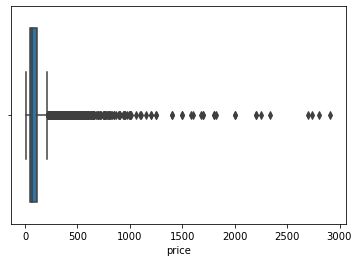

In [18]:
sns.boxplot(x=df['price'])

<AxesSubplot:xlabel='total_sqft_numeric'>

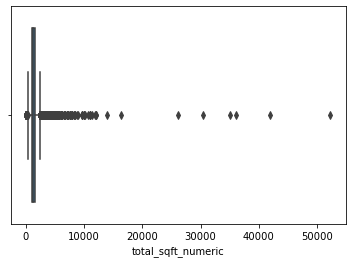

In [19]:
sns.boxplot(x=df['total_sqft_numeric'])

In [20]:
Q1=df['price'].quantile(0.25)
Q2=df['price'].quantile(0.5)
Q3=df['price'].quantile(0.75)

IQR=Q3-Q1

U_L=Q3+(1.5*IQR)
L_L=Q1-(1.5*IQR)

df[(df['price']>U_L) | (df['price']<L_L)]

,location,bath,balcony,price,Room_size,Room_type,total_sqft_numeric
11,Whitefield,5.0,3.0,295.0,4,Bedroom,2785.0
18,Ramakrishnappa Layout,4.0,2.0,290.0,3,BHK,2770.0
22,Thanisandra,5.0,2.0,380.0,4,Bedroom,2800.0
60,Tharabanahalli,3.0,2.0,240.0,3,Bedroom,4395.0
62,Whitefield,5.0,3.0,650.0,4,Bedroom,5700.0
...,...,...,...,...,...,...,...
13290,Sarjapur Road,2.0,1.0,450.0,4,BHK,4050.0
13305,Hulimavu,1.0,3.0,220.0,1,BHK,500.0
13311,Ramamurthy Nagar,9.0,2.0,250.0,7,Bedroom,1500.0
13315,Whitefield,4.0,0.0,231.0,5,Bedroom,3453.0


In [21]:
Q1=df['total_sqft_numeric'].quantile(0.25)
Q2=df['total_sqft_numeric'].quantile(0.5)
Q3=df['total_sqft_numeric'].quantile(0.75)

IQR=Q3-Q1

U_L=Q3+(1.5*IQR)
L_L=Q1-(1.5*IQR)

df[(df['total_sqft_numeric']>U_L) | (df['total_sqft_numeric']<L_L)]

,location,bath,balcony,price,Room_size,Room_type,total_sqft_numeric
1,Chikka Tirupathi,5.0,3.0,120.0,4,Bedroom,2600.0
11,Whitefield,5.0,3.0,295.0,4,Bedroom,2785.0
18,Ramakrishnappa Layout,4.0,2.0,290.0,3,BHK,2770.0
22,Thanisandra,5.0,2.0,380.0,4,Bedroom,2800.0
60,Tharabanahalli,3.0,2.0,240.0,3,Bedroom,4395.0
...,...,...,...,...,...,...,...
13268,EPIP Zone,5.0,2.0,221.0,4,BHK,3360.0
13290,Sarjapur Road,2.0,1.0,450.0,4,BHK,4050.0
13299,Whitefield,5.0,0.0,154.5,4,BHK,2830.0
13315,Whitefield,4.0,0.0,231.0,5,Bedroom,3453.0


# Checking skewness and Transformation

In [22]:
df['price'].skew()

7.875010857060082

In [23]:
df['total_sqft_numeric'].skew()

17.48791589260292

In [24]:
df['root_total_sqft_numeric']=(df['total_sqft_numeric'])**(1/8)
df['root_total_sqft_numeric'].skew()

0.09568930551168282

In [25]:
df['log_price']=np.log(df['price'])
df['log_price'].skew()

0.8146602488372249

In [26]:
df

,location,bath,balcony,price,Room_size,Room_type,total_sqft_numeric,root_total_sqft_numeric,log_price
0,Electronic City Phase II,2.0,1.0,39.07,2,BHK,1056.0,2.387580,3.665355
1,Chikka Tirupathi,5.0,3.0,120.00,4,Bedroom,2600.0,2.672217,4.787492
2,Uttarahalli,2.0,3.0,62.00,3,BHK,1440.0,2.481963,4.127134
3,Lingadheeranahalli,3.0,1.0,95.00,3,BHK,1521.0,2.498999,4.553877
4,Kothanur,2.0,1.0,51.00,2,BHK,1200.0,2.426038,3.931826
...,...,...,...,...,...,...,...,...,...
13314,Green Glen Layout,3.0,3.0,112.00,3,BHK,1715.0,2.536781,4.718499
13315,Whitefield,4.0,0.0,231.00,5,Bedroom,3453.0,2.768692,5.442418
13317,Raja Rajeshwari Nagar,2.0,1.0,60.00,2,BHK,1141.0,2.410797,4.094345
13318,Padmanabhanagar,4.0,1.0,488.00,4,BHK,4689.0,2.876637,6.190315


In [27]:
df.drop(["price","total_sqft_numeric"],axis=1,inplace=True)
df.head()

,location,bath,balcony,Room_size,Room_type,root_total_sqft_numeric,log_price
0,Electronic City Phase II,2.0,1.0,2,BHK,2.387580,3.665355
1,Chikka Tirupathi,5.0,3.0,4,Bedroom,2.672217,4.787492
2,Uttarahalli,2.0,3.0,3,BHK,2.481963,4.127134
3,Lingadheeranahalli,3.0,1.0,3,BHK,2.498999,4.553877
4,Kothanur,2.0,1.0,2,BHK,2.426038,3.931826


# Feature encoding through Labelencoder

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['encoded_location'] = le.fit_transform(df['location'])
df

,location,bath,balcony,Room_size,Room_type,root_total_sqft_numeric,log_price,encoded_location
0,Electronic City Phase II,2.0,1.0,2,BHK,2.387580,3.665355,407
1,Chikka Tirupathi,5.0,3.0,4,Bedroom,2.672217,4.787492,306
2,Uttarahalli,2.0,3.0,3,BHK,2.481963,4.127134,1141
3,Lingadheeranahalli,3.0,1.0,3,BHK,2.498999,4.553877,738
4,Kothanur,2.0,1.0,2,BHK,2.426038,3.931826,697
...,...,...,...,...,...,...,...,...
13314,Green Glen Layout,3.0,3.0,3,BHK,2.536781,4.718499,462
13315,Whitefield,4.0,0.0,5,Bedroom,2.768692,5.442418,1213
13317,Raja Rajeshwari Nagar,2.0,1.0,2,BHK,2.410797,4.094345,943
13318,Padmanabhanagar,4.0,1.0,4,BHK,2.876637,6.190315,882


In [29]:
df.drop(["location"],axis=1,inplace=True)
df.head()

,bath,balcony,Room_size,Room_type,root_total_sqft_numeric,log_price,encoded_location
0,2.0,1.0,2,BHK,2.387580,3.665355,407
1,5.0,3.0,4,Bedroom,2.672217,4.787492,306
2,2.0,3.0,3,BHK,2.481963,4.127134,1141
3,3.0,1.0,3,BHK,2.498999,4.553877,738
4,2.0,1.0,2,BHK,2.426038,3.931826,697


# one-hot encoding

In [30]:
df=pd.get_dummies(df,columns=['Room_type'],drop_first=True)
df

,bath,balcony,Room_size,root_total_sqft_numeric,log_price,encoded_location,Room_type_Bedroom,Room_type_RK
0,2.0,1.0,2,2.387580,3.665355,407,0,0
1,5.0,3.0,4,2.672217,4.787492,306,1,0
2,2.0,3.0,3,2.481963,4.127134,1141,0,0
3,3.0,1.0,3,2.498999,4.553877,738,0,0
4,2.0,1.0,2,2.426038,3.931826,697,0,0
...,...,...,...,...,...,...,...,...
13314,3.0,3.0,3,2.536781,4.718499,462,0,0
13315,4.0,0.0,5,2.768692,5.442418,1213,1,0
13317,2.0,1.0,2,2.410797,4.094345,943,0,0
13318,4.0,1.0,4,2.876637,6.190315,882,0,0


# Selecting Independent variable(X) and Dependent variable(y)

In [31]:
X=df.drop('log_price',axis=1)
X

,bath,balcony,Room_size,root_total_sqft_numeric,encoded_location,Room_type_Bedroom,Room_type_RK
0,2.0,1.0,2,2.387580,407,0,0
1,5.0,3.0,4,2.672217,306,1,0
2,2.0,3.0,3,2.481963,1141,0,0
3,3.0,1.0,3,2.498999,738,0,0
4,2.0,1.0,2,2.426038,697,0,0
...,...,...,...,...,...,...,...
13314,3.0,3.0,3,2.536781,462,0,0
13315,4.0,0.0,5,2.768692,1213,1,0
13317,2.0,1.0,2,2.410797,943,0,0
13318,4.0,1.0,4,2.876637,882,0,0


In [32]:
y=df['log_price']
y

0        3.665355
1        4.787492
2        4.127134
3        4.553877
4        3.931826
           ...   
13314    4.718499
13315    5.442418
13317    4.094345
13318    6.190315
13319    2.833213
Name: log_price, Length: 12710, dtype: float64

# Spliting Data into Train and Test

In [33]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
X_train

,bath,balcony,Room_size,root_total_sqft_numeric,encoded_location,Room_type_Bedroom,Room_type_RK
3162,3.0,3.0,3,2.527416,617,0,0
2769,3.0,2.0,3,2.559709,647,0,0
4522,2.0,2.0,3,2.481963,1213,0,0
7516,3.0,1.0,3,2.680477,278,0,0
3118,2.0,1.0,2,2.466551,947,0,0
...,...,...,...,...,...,...,...
12534,2.0,1.0,2,2.449017,501,0,0
5466,2.0,1.0,2,2.422227,943,0,0
5676,3.0,2.0,3,2.498588,97,0,0
904,1.0,1.0,1,2.349959,672,0,0


In [35]:
X_test

,bath,balcony,Room_size,root_total_sqft_numeric,encoded_location,Room_type_Bedroom,Room_type_RK
5369,1.0,1.0,1,2.174559,71,0,0
9452,2.0,2.0,2,2.432051,134,0,0
6940,2.0,2.0,2,2.477191,1116,0,0
9549,3.0,1.0,3,2.399795,647,0,0
5140,2.0,1.0,2,2.391514,814,0,0
...,...,...,...,...,...,...,...
5780,2.0,0.0,2,2.426038,627,1,0
5658,2.0,0.0,2,2.330451,1006,0,0
2753,2.0,2.0,2,2.400340,778,0,0
8149,2.0,0.0,1,2.233824,720,1,0


In [36]:
y_train

3162     4.248495
2769     4.562680
4522     4.158883
7516     5.857933
3118     5.135798
           ...   
12534    4.744932
5466     3.693120
5676     4.208120
904      3.401197
7648     4.174387
Name: log_price, Length: 10168, dtype: float64

In [37]:
y_test

5369     3.433987
9452     4.204693
6940     4.653960
9549     4.060443
5140     3.904998
           ...   
5780     3.970292
5658     3.341978
2753     3.982854
8149     3.871201
11252    4.240751
Name: log_price, Length: 2542, dtype: float64

# Feature Scaling

In [38]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

X_train.iloc[:,[3]]=sc.fit_transform(X_train.iloc[:,[3]])
X_test.iloc[:,[3]]=sc.transform(X_test.iloc[:,[3]])

In [39]:
X_train

,bath,balcony,Room_size,root_total_sqft_numeric,encoded_location,Room_type_Bedroom,Room_type_RK
3162,3.0,3.0,3,0.441644,617,0,0
2769,3.0,2.0,3,0.666395,647,0,0
4522,2.0,2.0,3,0.125302,1213,0,0
7516,3.0,1.0,3,1.506906,278,0,0
3118,2.0,1.0,2,0.018038,947,0,0
...,...,...,...,...,...,...,...
12534,2.0,1.0,2,-0.103994,501,0,0
5466,2.0,1.0,2,-0.290446,943,0,0
5676,3.0,2.0,3,0.241010,97,0,0
904,1.0,1.0,1,-0.793405,672,0,0


In [40]:
X_test

,bath,balcony,Room_size,root_total_sqft_numeric,encoded_location,Room_type_Bedroom,Room_type_RK
5369,1.0,1.0,1,-2.014141,71,0,0
9452,2.0,2.0,2,-0.222072,134,0,0
6940,2.0,2.0,2,0.092091,1116,0,0
9549,3.0,1.0,3,-0.446566,647,0,0
5140,2.0,1.0,2,-0.504196,814,0,0
...,...,...,...,...,...,...,...
5780,2.0,0.0,2,-0.263918,627,1,0
5658,2.0,0.0,2,-0.929181,1006,0,0
2753,2.0,2.0,2,-0.442774,778,0,0
8149,2.0,0.0,1,-1.601675,720,1,0


# Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
model=LinearRegression()

#creating linear regression model
model.fit(X_train,y_train)


# Predicting on train and test data
y_pred_train=model.predict(X_train)
y_pred_test =model.predict(X_test)

#Evaluation
r2_train=r2_score(y_train,y_pred_train)
r2_test=r2_score(y_test,y_pred_test)
print('Train r2 Score:',r2_train)
print('Test r2 Score:',r2_test)
mae=mean_absolute_error(y_test,y_pred_test)
print('mean_absolute_error:',mae)
mse=mean_squared_error(y_test,y_pred_test)
print('mean_squared_error:',mse)
rmse=(mse)**(1/2)
print('root_mean_squared_error:',rmse)




Train r2 Score: 0.6371524638344127
Test r2 Score: 0.6084799108024189
mean_absolute_error: 0.30937149964911165
mean_squared_error: 0.19707564849477152
root_mean_squared_error: 0.44393203139081044


# Random Forest

In [42]:
from sklearn.ensemble import RandomForestRegressor

# Creating Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42,max_depth=5)

# Training the Random Forest Regressor model
rf_model.fit(X_train, y_train)

# Predicting on test data
y_pred_train=rf_model.predict(X_train)
y_pred_test =rf_model.predict(X_test)

#Evaluation
r2_train=r2_score(y_train,y_pred_train)
r2_test=r2_score(y_test,y_pred_test)
print('Train r2 Score:',r2_train)
print('Test r2 Score:',r2_test)
mae=mean_absolute_error(y_test,y_pred_test)
print('mean_absolute_error:',mae)
mse=mean_squared_error(y_test,y_pred_test)
print('mean_squared_error:',mse)
rmse=(mse)**(1/2)
print('root_mean_squared_error:',rmse)

Train r2 Score: 0.7393781327550177
Test r2 Score: 0.7237655758817031
mean_absolute_error: 0.27476320015614125
mean_squared_error: 0.1390454277359453
root_mean_squared_error: 0.37288795600816244


# Boosting

In [66]:
import xgboost as xgb

# Creating XGBoost Regressor model
xgb_model = xgb.XGBRegressor(n_estimators = 13,random_state=42)
        
# Training the XGBoost Regressor model
xgb_model.fit(X_train, y_train)

# Predicting on test data
y_pred_train=xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)

#Evaluation
r2_train=r2_score(y_train,y_pred_train)
r2_test=r2_score(y_test,y_pred_test)
print('Train r2 Score:',r2_train)
print('Test r2 Score:',r2_test)
mae=mean_absolute_error(y_test,y_pred_test)
print('mean_absolute_error:',mae)
mse=mean_squared_error(y_test,y_pred_test)
print('mean_squared_error:',mse)
rmse=(mse)**(1/2)
print('root_mean_squared_error:',rmse)


Train r2 Score: 0.798692463927754
Test r2 Score: 0.7531978088010798
mean_absolute_error: 0.2570430592589193
mean_squared_error: 0.12423041172712905
root_mean_squared_error: 0.3524633480620773


# Decision Tree

In [44]:
from sklearn.tree import DecisionTreeRegressor

# Create a DecisionTreeRegressor object
regressor = DecisionTreeRegressor(random_state=42,max_depth=5)

# Fit the model to the training data
regressor.fit(X_train, y_train)

# Predicting on test data
y_pred_train=regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

#Evaluation
r2_train=r2_score(y_train,y_pred_train)
r2_test=r2_score(y_test,y_pred_test)
print('Train r2 Score:',r2_train)
print('Test r2 Score:',r2_test)
mae=mean_absolute_error(y_test,y_pred_test)
print('mean_absolute_error:',mae)
mse=mean_squared_error(y_test,y_pred_test)
print('mean_squared_error:',mse)
rmse=(mse)**(1/2)
print('root_mean_squared_error:',rmse)


Train r2 Score: 0.7220879892227479
Test r2 Score: 0.7101025166090308
mean_absolute_error: 0.2813273224041666
mean_squared_error: 0.1459228686154235
root_mean_squared_error: 0.38199851912726507


# Model Selection

In [ ]:
#My final model is XGboost as it gives maximum accuracy compared to others